In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [16]:
data = pd.read_csv(r"C:\Users\ADMIN\Downloads\diamonds_new.csv")
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [17]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [19]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

#### Finding and Removing Duplicates

In [20]:
data[data.duplicated()]

,carat,cut,color,clarity,table,x,y,z,price_new
1005,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
1006,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
1007,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
1008,0.79,Ideal,G,SI1,57.0,5.90,5.85,3.66,1449.0
2025,1.52,Good,E,I1,58.0,7.53,7.42,4.28,1552.5
...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,55.0,5.19,5.16,3.20,959.5
49326,0.51,Ideal,F,VVS2,56.0,5.17,5.19,3.17,1046.5
49557,0.71,Good,F,SI2,60.0,0.00,0.00,0.00,1065.0
50079,0.51,Ideal,F,VVS2,56.0,5.19,5.17,3.17,1101.5


In [21]:
data = data.drop_duplicates()
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5







#### Handling missing values

In [22]:
color_mode = data.color.mode()
color_mode

0    G
Name: color, dtype: object

In [23]:

carat_mean = data.carat.mean()
color_mode = 'G'
table_mean = data.table.mean()
data['carat']=data['carat'].fillna(carat_mean)
data['color']= data['color'].fillna(color_mode)
data['table'] = data['table'].fillna(table_mean)
data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2800\1895768784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['carat']=data['carat'].fillna(carat_mean)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2800\1895768784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color']= data['color'].fillna(color_mode)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2800\1895768784.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [24]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

#### Excluding Outliers

In [25]:
def remove_outliers_zscr(df,column,threshold):
    z_scr = (column-column.mean())/column.std()
    non_outliers = (abs(z_scr)<=threshold)
    df_no_outliers = df[non_outliers]
    return df_no_outliers

In [26]:
cleaned1 = remove_outliers_zscr(data,data.carat,2.5)
cleaned2 = remove_outliers_zscr(cleaned1,data.table,2.5)
cleaned3 = remove_outliers_zscr(cleaned2,data.x,2.5)
cleaned4 = remove_outliers_zscr(cleaned3,data.y,2.5)
cleaned5 = remove_outliers_zscr(cleaned4,data.z,2.5)
cleaned6 = remove_outliers_zscr(cleaned5,data.price_new,2.5)
data2 = cleaned6
data2

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2800\929030375.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df[non_outliers]


,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


#### Encoding Categorical data

In [28]:
cut = pd.DataFrame(data2.cut)
color = pd.DataFrame(data2.color)
clarity = pd.DataFrame(data2.clarity)

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_cut = label_encoder.fit_transform(cut)
encoded_color = label_encoder.fit_transform(color)
encoded_clarity = label_encoder.fit_transform(clarity)
data2.cut = encoded_cut
data2.color = encoded_color
data2.clarity = encoded_clarity
data2

C:\Users\ADMIN\Desktop\New folder\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Desktop\New folder\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Desktop\New folder\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2800\446999365.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,1,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,1,2,61.0,3.89,3.84,2.31,163.0
3,0.29,3,5,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,6,3,58.0,4.34,4.35,2.75,167.5
5,0.24,4,6,7,57.0,3.94,3.96,2.48,168.0
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,57.0,5.75,5.76,3.50,1378.5
53936,0.72,1,0,2,55.0,5.69,5.75,3.61,1378.5
53937,0.70,4,0,2,60.0,5.66,5.68,3.56,1378.5
53938,0.86,3,4,3,58.0,6.15,6.12,3.74,1378.5


#### Scaling

In [30]:
# using Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data2)
scaled_data

array([[1.70454545e-02, 5.00000000e-01, 1.66666667e-01, ...,
        6.62251656e-02, 1.20915033e-01, 0.00000000e+00],
       [5.68181818e-03, 7.50000000e-01, 1.66666667e-01, ...,
        3.53200883e-02, 8.16993464e-02, 0.00000000e+00],
       [5.11363636e-02, 7.50000000e-01, 8.33333333e-01, ...,
        1.21412804e-01, 1.86274510e-01, 5.89231789e-04],
       ...,
       [2.84090909e-01, 1.00000000e+00, 0.00000000e+00, ...,
        4.41501104e-01, 4.90196078e-01, 1.79052810e-01],
       [3.75000000e-01, 7.50000000e-01, 6.66666667e-01, ...,
        5.38631347e-01, 5.49019608e-01, 1.79052810e-01],
       [3.12500000e-01, 5.00000000e-01, 0.00000000e+00, ...,
        4.83443709e-01, 5.16339869e-01, 1.79052810e-01]])

In [32]:
result_norm = pd.DataFrame(data = scaled_data,columns=data2.columns)
result_norm

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.017045,0.50,0.166667,0.428571,0.272727,0.049661,0.066225,0.120915,0.000000
1,0.005682,0.75,0.166667,0.285714,0.818182,0.036117,0.035320,0.081699,0.000000
2,0.051136,0.75,0.833333,0.714286,0.545455,0.106095,0.121413,0.186275,0.000589
3,0.062500,0.25,1.000000,0.428571,0.545455,0.137698,0.147903,0.225490,0.000663
4,0.022727,1.00,1.000000,1.000000,0.454545,0.047404,0.061810,0.137255,0.000737
...,...,...,...,...,...,...,...,...,...
50276,0.295455,0.50,0.000000,0.285714,0.454545,0.455982,0.459161,0.470588,0.179053
50277,0.295455,0.25,0.000000,0.285714,0.272727,0.442438,0.456954,0.506536,0.179053
50278,0.284091,1.00,0.000000,0.285714,0.727273,0.435666,0.441501,0.490196,0.179053
50279,0.375000,0.75,0.666667,0.428571,0.545455,0.546275,0.538631,0.549020,0.179053


#### Finding correlation

In [33]:
correlation = result_norm.corr()
correlation

,carat,cut,color,clarity,table,x,y,z,price_new
carat,1.000000,0.027088,0.246995,-0.208776,0.181479,0.985572,0.984671,0.984549,0.915308
cut,0.027088,1.000000,0.000513,0.020968,0.245833,0.030810,0.035899,0.004068,0.041517
color,0.246995,0.000513,1.000000,-0.013982,0.014271,0.226908,0.226826,0.232110,0.122420
clarity,-0.208776,0.020968,-0.013982,1.000000,-0.084917,-0.218549,-0.215451,-0.222633,-0.050082
table,0.181479,0.245833,0.014271,-0.084917,1.000000,0.187663,0.182201,0.149652,0.123806
x,0.985572,0.030810,0.226908,-0.218549,0.187663,1.000000,0.998417,0.990954,0.887941
y,0.984671,0.035899,0.226826,-0.215451,0.182201,0.998417,1.000000,0.990469,0.889640
z,0.984549,0.004068,0.232110,-0.222633,0.149652,0.990954,0.990469,1.000000,0.883143
price_new,0.915308,0.041517,0.122420,-0.050082,0.123806,0.887941,0.889640,0.883143,1.000000


<Axes: >

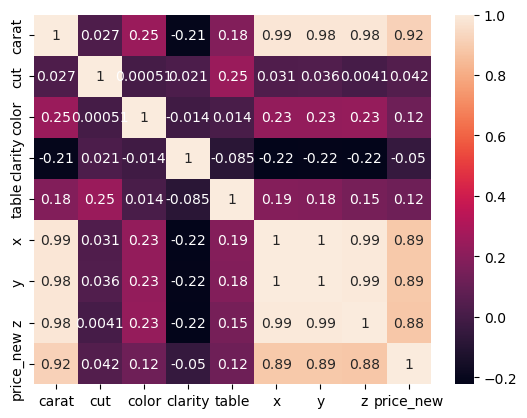

In [34]:
sns.heatmap(correlation,annot=True)